In [1]:
import numpy as np
import collections
import matplotlib.pyplot as plt

from floquet_simulations.plot_functions import PlotParams
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

PlotParams()

def GaugeFix(evecs):
    for vec in range(len(evecs[0])):
        if evecs[0,vec] < 0:
            evecs[:,vec] = -evecs[:,vec]
    return evecs

#SSS
def PlotRealHam(Ham, figsize=(6, 6)):
    cm_unit = 1/2.54
    colourbar_absmax = np.max([np.abs(np.min(Ham)), np.max(Ham)])

    # axes_tick_labels=[rf"${i}$" for i in axes_tick_pos+np.array([1])] 
    # data_cmap_lims = (-1 ,1); colourbar_cmap_lims=(-1,0.5); colourbar_ticks = np.arange(-1,1.5,0.5)
    norm = mpl.colors.Normalize(vmin=-colourbar_absmax, vmax=colourbar_absmax)
    cmap = mpl.colors.LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', "#FFFFFF", '#F78320'], N=256)

    bbox_colourbar_anchor = (0.9, 0.57, 1, 0.73)

    fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit))
    pcm = ax.matshow(np.real(Ham), interpolation='none', cmap=cmap,  norm=norm)
    ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
            labeltop=False, direction = "in", length = 3, pad=2)  
    ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
            labelright=False, direction = "in", length = 3, pad=2)  

    ax.set_ylabel('$i$', rotation=0)
    # ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
    # ax.set_yticks(axes_tick_pos)
    # ax.set_yticklabels(axes_tick_labels)#, font="stix", fontsize=fontsize*0.9)

    ax.set_xlabel("$j$")
    # ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
    # ax.set_xticks(axes_tick_pos)
    # ax.set_xticklabels(axes_tick_labels)#, font="stix", fontsize=fontsize*0.9)

    # ax.set_title(r'$[H_S^{t_0}]_{i,j}/J$')

    # new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
    # new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
    axins = inset_axes(
        ax,
        width="5%",  # width: 5% of parent_bbox width
        height="50%",  # height: 50%
        loc="lower left",
        bbox_to_anchor=bbox_colourbar_anchor,
        bbox_transform=ax.transAxes,
        borderpad=0,
    )
    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=axins, 
                        # ticks=colourbar_ticks,
                          ticklocation="left")
    cbar.ax.tick_params(labelsize=12*0.7, pad=0)
    # fig.savefig(save_fig_dir/"strob_ham_single_site_shake.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
    plt.show()

    # Build matrix
def BuildMatrix(N, Js, J_indices):
    assert(len(Js) == len(J_indices))
    Ham = np.zeros((N, N))
    for index in range(len(J_indices)):
        for (i, j) in J_indices[index]:
            Ham[i, j] = Js[index]; Ham[j, i] = Js[index]
    return Ham

# Simulate 7x7 Ham

In [2]:
n = 7
J1_ind = [(24, 1), (24,n), (24,-n), (24, -1)]
J2_ind = [(17, 1), (18,n), (25, n), (31, 1), 
          (30, 1), (23, n), (16, n), (16, 1)]
J3_ind = [(10, n), (25, 1), (31, n), (22, 1)]
J4_ind = [(11, n), (18, 1), (32, 1), (32, n), 
          (30, n), (30, -1), (15, 1), (9, n)]
J5_ind = [(10, 1), (19, n), (26, n), (38, 1),
          (37, 1), (22, n), (15, n), (9, 1)]
J6_ind = [(11, 1), (12, n), (33, n), (39, 1), 
          (36, 1), (29, n), (8, n), (8, 1)]
J7_ind = [(3, n), (26, 1), (38, n), (21, 1)]
J8_ind = [(4, n), (19, 1), (33, 1), (39, n),
          (37, n), (28, 1), (14, 1), (2, n)]
J9_ind = [(5, n), (12, 1), (40, 1), (40, n),
          (36, n), (35, 1), (7, 1), (1, n)]
J10_ind = [(3, 1), (20, n), (27, n), (45, 1),
           (44, 1), (21, n), (14, n), (2, 1)]
J11_ind = [(4, 1), (13, n), (34, n), (46, 1),
           (43, 1), (28, n), (7, n), (1, 1)]
J12_ind = [(5, 1), (6, n), (41, n), (47, 1),
           (42, 1), (35, n), (0, n), (0, 1)]

J1_ind_num = [(i, i+j) for (i, j) in J1_ind]
J2_ind_num = [(i, i+j) for (i, j) in J2_ind]
J3_ind_num = [(i, i+j) for (i, j) in J3_ind]
J4_ind_num = [(i, i+j) for (i, j) in J4_ind]
J5_ind_num = [(i, i+j) for (i, j) in J5_ind]
J6_ind_num = [(i, i+j) for (i, j) in J6_ind]
J7_ind_num = [(i, i+j) for (i, j) in J7_ind]
J8_ind_num = [(i, i+j) for (i, j) in J8_ind]
J9_ind_num = [(i, i+j) for (i, j) in J9_ind]
J10_ind_num = [(i, i+j) for (i, j) in J10_ind]
J11_ind_num = [(i, i+j) for (i, j) in J11_ind]
J12_ind_num = [(i, i+j) for (i, j) in J12_ind]

# Check it works
Js_ind = J1_ind_num + J2_ind_num + J3_ind_num + J4_ind_num + J5_ind_num + J6_ind_num + J7_ind_num + J8_ind_num + J9_ind_num + J10_ind_num + J11_ind_num + J12_ind_num
Js_ind_sort = sorted(Js_ind)
print([item for item, count in collections.Counter(Js_ind).items() if count > 1])
print(len(Js_ind), len(Js_ind_sort), 2*7*6)


[]
84 84 84


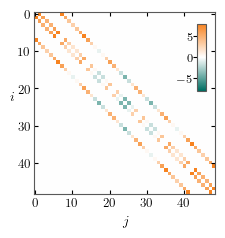

In [3]:
# Build matrix
# H7 = np.zeros((7*7, 7*7))
# J1 = -5; J2 = -3; J3 = -1; J4 = 1
# J5 = 2; J6 = 3; J7 = 4; J8 = 5
# J9 = 6; J10  = 7; J11 =8; J12 = 9

J1= -0.40259 
J2= -0.16885 
J3= -0.06831 
J4= 0.03895 
J5= 0.16077 
J6= 0.29826 
J7= 0.29286
J8= 0.35884
J9= 0.54081
J10= 0.49037
J11= 0.59716
J12= 0.78837

H7= 10*BuildMatrix(7*7, [J1, J2, J3, J4, J5, J6, J7, J8, J9, J10, J11, J12],
                    [J1_ind_num, J2_ind_num, J3_ind_num, J4_ind_num, J5_ind_num, J6_ind_num, 
                     J7_ind_num, J8_ind_num, J9_ind_num, J10_ind_num, J11_ind_num, J12_ind_num])
PlotRealHam(H7)


#### Use 13 points to simulate 7x7

In [4]:
# using 13 points
J1_ind_num = [(12, 8)]
J2_ind_num = [(8, 9)]
J3_ind_num = [(4, 8)]
J4_ind_num = [(5, 9), (9, 10)]
J5_ind_num = [(4, 5), (10, 4)]
J6_ind_num = [(5, 6), (6, 10)]
J7_ind_num = [(0, 4)]
J8_ind_num = [(1, 5),(10,11)]
J9_ind_num = [(2, 6), (6, 7)]
J10_ind_num = [(0, 1), (11, 0)]
J11_ind_num = [(1, 2), (7, 11)]
J12_ind_num = [(2, 3), (3, 7)]

#Sanity check
Js_ind = J1_ind_num + J2_ind_num + J3_ind_num + J4_ind_num + J5_ind_num + J6_ind_num + J7_ind_num + J8_ind_num + J9_ind_num + J10_ind_num + J11_ind_num + J12_ind_num
Js_ind_sort = sorted(Js_ind)
print([item for item, count in collections.Counter(Js_ind).items() if count > 1])
print(len(Js_ind), len(Js_ind_sort), 20)

[]
20 20 20


In [5]:
H4 = 10*BuildMatrix(13, [2*J1, 2*J2, J3, J4, J5, J6, J7, J8, J9, J10, J11, J12],
                    [J1_ind_num, J2_ind_num, J3_ind_num, J4_ind_num, J5_ind_num, J6_ind_num, 
                     J7_ind_num, J8_ind_num, J9_ind_num, J10_ind_num, J11_ind_num, J12_ind_num])
evals4, evecs4 = np.linalg.eigh(H4)
evecs4 = GaugeFix(evecs4)

In [6]:
# # check other choices, show 2*J2 and 2*J1 is best go

# H4_v2 = BuildMatrix(13, [J1, 2*J2, J3, J4, J5, J6, J7, J8, J9, J10, J11, J12],
#                     [J1_ind_num, J2_ind_num, J3_ind_num, J4_ind_num, J5_ind_num, J6_ind_num, 
#                      J7_ind_num, J8_ind_num, J9_ind_num, J10_ind_num, J11_ind_num, J12_ind_num])

# H4_v3 = BuildMatrix(13, [2*J1, J2, J3, J4, J5, J6, J7, J8, J9, J10, J11, J12],
#                     [J1_ind_num, J2_ind_num, J3_ind_num, J4_ind_num, J5_ind_num, J6_ind_num, 
#                      J7_ind_num, J8_ind_num, J9_ind_num, J10_ind_num, J11_ind_num, J12_ind_num])

# H4_v4 = BuildMatrix(13, [J1, J2, J3, J4, J5, J6, J7, J8, J9, J10, J11, J12],
#                     [J1_ind_num, J2_ind_num, J3_ind_num, J4_ind_num, J5_ind_num, J6_ind_num, 
#                      J7_ind_num, J8_ind_num, J9_ind_num, J10_ind_num, J11_ind_num, J12_ind_num])

# H4_v5 = BuildMatrix(13, [0.5*J1, J2, J3, J4, J5, J6, J7, J8, J9, J10, J11, J12],
#                     [J1_ind_num, J2_ind_num, J3_ind_num, J4_ind_num, J5_ind_num, J6_ind_num, 
#                      J7_ind_num, J8_ind_num, J9_ind_num, J10_ind_num, J11_ind_num, J12_ind_num])

# H4_v6 = BuildMatrix(13, [0.5*J1, 0.5*J2, J3, J4, J5, J6, J7, J8, J9, J10, J11, J12],
#                     [J1_ind_num, J2_ind_num, J3_ind_num, J4_ind_num, J5_ind_num, J6_ind_num, 
#                      J7_ind_num, J8_ind_num, J9_ind_num, J10_ind_num, J11_ind_num, J12_ind_num])

# H4_v7 = BuildMatrix(13, [J1, 0.5*J2, J3, J4, J5, J6, J7, J8, J9, J10, J11, J12],
#                     [J1_ind_num, J2_ind_num, J3_ind_num, J4_ind_num, J5_ind_num, J6_ind_num, 
#                      J7_ind_num, J8_ind_num, J9_ind_num, J10_ind_num, J11_ind_num, J12_ind_num])


# evals4_v2, evecs4_v2 = np.linalg.eigh(H4_v2)
# evals4_v3, evecs4_v3 = np.linalg.eigh(H4_v3)
# evals4_v4, evecs4_v4 = np.linalg.eigh(H4_v4)
# evals4_v5, evecs4_v5 = np.linalg.eigh(H4_v5)
# evals4_v6, evecs4_v6 = np.linalg.eigh(H4_v6)
# evals4_v7, evecs4_v7 = np.linalg.eigh(H4_v7)
# evals7, evecs7 = np.linalg.eigh(H7)

# sum_of_least_squares_each_version = []
# for evals_ver in [evals4, evals4_v2,evals4_v3,evals4_v4,evals4_v5,evals4_v6,evals4_v7]:
#     corresponding_evals_ind = []
#     for eval in evals_ver:
#         corresponding_evals_ind.append(np.abs(evals7 - eval).argmin())
#     evals7_corresp = evals7[corresponding_evals_ind]
#     sum_of_least_squares_each_version.append(np.sum(np.abs(np.array(evals7_corresp) - np.array(evals_ver))))
    
# print(sum_of_least_squares_each_version)

#### Compare 8x8 and 4x4 v1

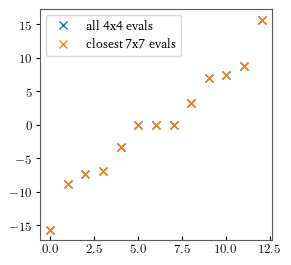

In [7]:
top_right_quarter_ind = [3, 4, 5, 6, 10, 11, 12, 13, 17, 18, 19, 20, 24]
evals7, evecs7 = np.linalg.eigh(H7)
evecs7_trq = evecs7[top_right_quarter_ind, :]
evecs7_trq = GaugeFix(evecs7_trq)
corresponding_evals_ind = []
for eval in evals4:
    corresponding_evals_ind.append(np.abs(evals7 - eval).argmin())

fig, ax = plt.subplots(figsize=(3,3))
ax.plot(range(13), evals4, 'x', label="all 4x4 evals")
ax.plot(range(13), evals7[corresponding_evals_ind], 'x', label="closest 7x7 evals")
ax.legend()
plt.show()


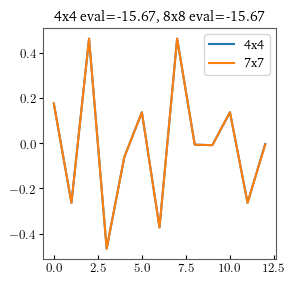

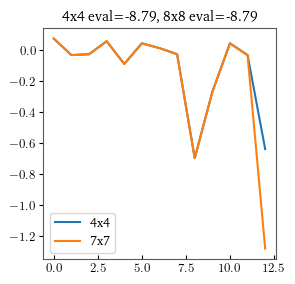

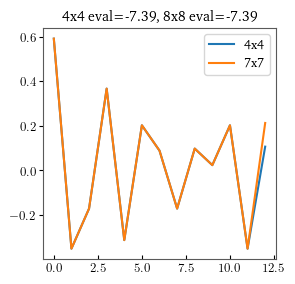

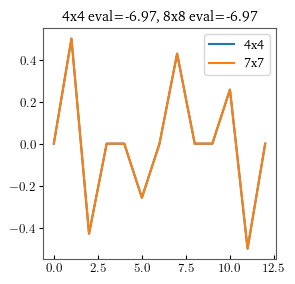

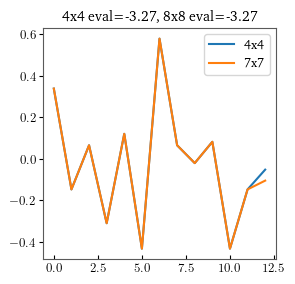

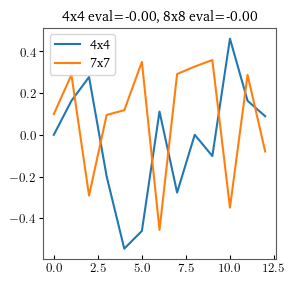

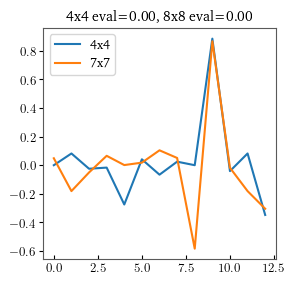

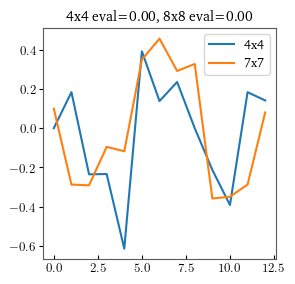

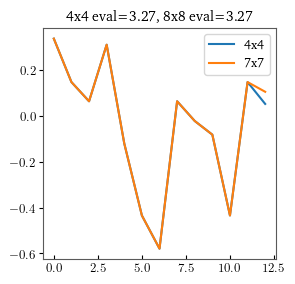

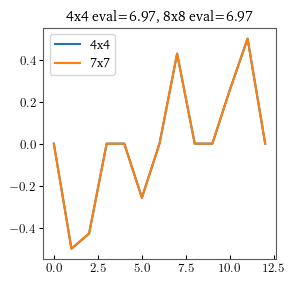

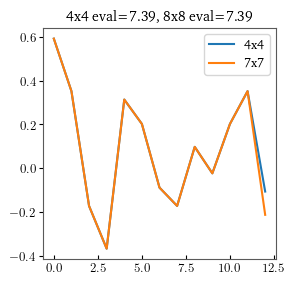

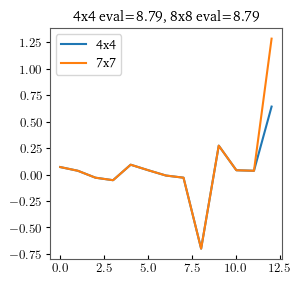

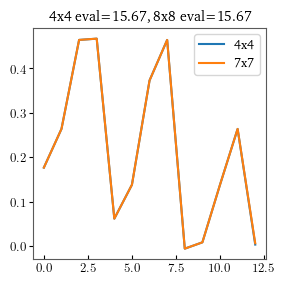

In [12]:
# check evecs

for evec_ind in range(13):
    fig, ax = plt.subplots(figsize=(3,3))
    ax.plot(range(13), evecs4[:,evec_ind], label=f"4x4")
    ax.plot(range(13), 2*evecs7_trq[:,corresponding_evals_ind[evec_ind]], label=f"7x7")
    ax.set_title(f"4x4 eval={evals4[evec_ind]:.2f}, 8x8 eval={evals7[corresponding_evals_ind[evec_ind]]:.2f}")
    ax.legend()
    plt.show()



#### v2

In [9]:
# using 9 points
J1_ind_num = [(7, 9)]
J2_ind_num = [(7, 8)]
J3_ind_num = [(4, 7)]
J4_ind_num = [(5, 8)]
J5_ind_num = [(4, 5)]
J6_ind_num = [(5, 6)]
J7_ind_num = [(0, 4)]
J8_ind_num = [(1, 5)]
J9_ind_num = [(2, 6)]
J10_ind_num = [(0, 1)]
J11_ind_num = [(1, 2)]
J12_ind_num = [(2, 3)]

#Sanity check
Js_ind = J1_ind_num + J2_ind_num + J3_ind_num + J4_ind_num + J5_ind_num + J6_ind_num + J7_ind_num + J8_ind_num + J9_ind_num + J10_ind_num + J11_ind_num + J12_ind_num
Js_ind_sort = sorted(Js_ind)
print([item for item, count in collections.Counter(Js_ind).items() if count > 1])
print(len(Js_ind), len(Js_ind_sort), 12)

[]
12 12 12


In [10]:
# Build matrix
H4_v2 = np.zeros((10, 10))

for (i, j) in J1_ind_num:
    H4_v2[i, j] = J1; H4_v2[j, i] = J1
for (i, j) in J2_ind_num:
    H4_v2[i, j] = 2*J2; H4_v2[j, i] = 2*J2
for (i, j) in J3_ind_num:
    H4_v2[i, j] = 2*J3; H4_v2[j, i] = 2*J3
for (i, j) in J4_ind_num:
    H4_v2[i, j] = 2*J4; H4_v2[j, i] = 2*J4
for (i, j) in J5_ind_num:
    H4_v2[i, j] = 2*J5; H4_v2[j, i] = 2*J5
for (i, j) in J6_ind_num:
    H4_v2[i, j] = 2*J6; H4_v2[j, i] = 2*J6
for (i, j) in J7_ind_num:
    H4_v2[i, j] = 2*J7; H4_v2[j, i] = 2*J7
for (i, j) in J8_ind_num:
    H4_v2[i, j] = 2*J8; H4_v2[j, i] = 2*J8
for (i, j) in J9_ind_num:
    H4_v2[i, j] = 2*J9; H4_v2[j, i] = 2*J9
for (i, j) in J10_ind_num:
    H4_v2[i, j] = 2*J10; H4_v2[j, i] = 2*J10
for (i, j) in J11_ind_num:
    H4_v2[i, j] = 2*J10; H4_v2[j, i] = 2*J11
for (i, j) in J12_ind_num:
    H4_v2[i, j] = 2*J10; H4_v2[j, i] = 2*J12

In [11]:
evals4_v2, evecs4_v2 = np.linalg.eigh(H4_v2)
evals8, evecs8 = np.linalg.eigh(H8)
evecs8 = GaugeFix(evecs8)
evecs4_v2 = GaugeFix(evecs4_v2)

# top_right_quarter_ind = [3, 4, 5, 6, 10, 11, 12, 13, 17, 18, 19, 20, 24]

# evecs8_trq = evecs8[top_right_quarter_ind, :]
# evecs8_trq = GaugeFix(evecs8_trq)
# corresponding_evals_ind = [3, 4, 11, 15, 19, 22, 23, 26, 61]
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(range(len(evals4_v1)), evals4_v1, 'x')
ax.plot(range(len(evals8)), evals8, 'x')
plt.show()


# for H4_eval_ind in range(9):

#     fig, ax = plt.subplots(figsize=(4,4))
#     ax.plot(range(16), evecs4[:,H4_eval_ind], label='4x4')
#     ax.plot(range(16), evecs8_trq[:,corresponding_evals_ind[H4_eval_ind]]*2, label="8x8")
#     ax.legend()
#     # ax.plot(range(16), evecs8[top_right_quarter_ind, corresponding_evals_ind[H4_eval_ind]]*2)
#     plt.show()




NameError: name 'H8' is not defined